In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import StackingClassifier

### **Run below to import the imputed dataset or go to the next cell to run the non imputed dataset. The non imputed dataset performed much better, despite containing fewer instances**

In [ ]:
# Import imputed whole imputed dataset
df = pd.read_excel(r"/content/drive/MyDrive/Fallers_prediction/mixed_imputed_dataset.xlsx",index_col=0,skiprows=[1,23,40,50,71,72,73])

# If year falls greater than 0 set to 1
df["Year Fall"] = df["Year Fall"].replace([2,3,4,5,6,7,8,9,10],1)
print(df['Year Fall'].value_counts())

# Set features and Year Fall as target variable
#selected_features = ["tandem_eyes_open",'dom_freq_v','s3(velocity)','Gender(1-female, 0-male)','DGI stairs']
y = df["Year Fall"].values
X = df.drop(['Year Fall','yr almost','6 Months Fall'],axis=1).values
#X = df.loc[:,selected_features].values
X_scaled = MinMaxScaler().fit_transform(X)
#column_names = df.loc[:,selected_features].columns
column_names = df.drop(['Year Fall','yr almost','6 Months Fall'],axis=1).columns
print(column_names)

1    33
0    29
Name: Year Fall, dtype: int64
Index(['GCS (Neurotrax)', 'EFI (Exe. Func. Index)', 'Gender(1-female, 0-male)',
       'Age', 'GDS', 'ABC Tot %', 'SF-36', 'PASE', 'MMSE', 'MoCa', 'FAB',
       'TMTa', 'TMTb', 'TUG', 'FSST', 'BERG', 'DGI', 'DGI stairs',
       'base(velocity)', 's3(velocity)', 'feet close eyes open',
       'feet close eyes closed', 'tandem_eyes_open', 'tandem_eyes_closed',
       'sampen_ap', 'sampen_ml', 'sampen_v', 'dom_freq_ap', 'dom_freq_ampl_ap',
       'dom_freq_width_ap', 'dom_freq_slope_ap', 'dom_freq_ml',
       'dom_freq_ampl_ml', 'dom_freq_width_ml', 'dom_freq_slope_ml',
       'dom_freq_v', 'dom_freq_ampl_v', 'dom_freq_width_v',
       'dom_freq_slope_v'],
      dtype='object')


### **Run below to import the non imputed dataset. The rows containing missing values are dropped.**

In [ ]:
# Import whole non imputed dataset
df = pd.read_excel(r"/content/drive/MyDrive/Fallers_prediction/mixed_non_imputed_dataset.xlsx",index_col=0)

# If year falls greater than 0 set to 1
df["Year Fall"] = df["Year Fall"].replace([2,3,4,5,6,7,8,9,10],1)

# Drop 3 columns
df.drop(['yr almost','6 Months Fall','Date of Evaluation'],axis=1,inplace=True)

# Replace n/a with np.nan
df.replace(r'^n',np.nan,regex=True,inplace=True)

# Drop rows containing N/As
df.dropna(inplace=True)

# Set a subset of features and Year Fall as target variable
'''selected_vars = ['sampen_ap', 'sampen_ml', 'sampen_v', 'dom_freq_ap', 'dom_freq_ampl_ap',
       'dom_freq_width_ap', 'dom_freq_slope_ap', 'dom_freq_ml',
       'dom_freq_ampl_ml', 'dom_freq_width_ml', 'dom_freq_slope_ml',
       'dom_freq_v', 'dom_freq_ampl_v', 'dom_freq_width_v',
       'dom_freq_slope_v','Age','feet close eyes closed','Gender(1-female, 0-male)']

y = df["Year Fall"].values
X = df.loc[:,selected_vars].values
X_scaled = MinMaxScaler().fit_transform(X)
column_names = df.loc[:,selected_vars].columns'''

# Set the whole features except Year Fall as X and Year Fall as target
y = df["Year Fall"].values
X = df.drop(['Year Fall'],axis=1).values
X_scaled = MinMaxScaler().fit_transform(X)
column_names = df.drop(['Year Fall'],axis=1).columns
print(column_names)
print(df['Year Fall'].value_counts())


Index(['GCS (Neurotrax)', 'EFI (Exe. Func. Index)', 'Gender(1-female, 0-male)',
       'Age', 'GDS', 'ABC Tot %', 'SF-36', 'PASE', 'MMSE', 'MoCa', 'FAB',
       'TMTa', 'TMTb', 'TUG', 'FSST', 'BERG', 'DGI', 'DGI stairs',
       'base(velocity)', 's3(velocity)', 'feet close eyes open',
       'feet close eyes closed', 'tandem_eyes_open', 'tandem_eyes_closed',
       'sampen_ap', 'sampen_ml', 'sampen_v', 'dom_freq_ap', 'dom_freq_ampl_ap',
       'dom_freq_width_ap', 'dom_freq_slope_ap', 'dom_freq_ml',
       'dom_freq_ampl_ml', 'dom_freq_width_ml', 'dom_freq_slope_ml',
       'dom_freq_v', 'dom_freq_ampl_v', 'dom_freq_width_v',
       'dom_freq_slope_v'],
      dtype='object')
1.0    27
0.0    24
Name: Year Fall, dtype: int64


In [ ]:
# check for multicollinearity

df_vif = pd.DataFrame()
df_vif["Feature"] = column_names
df_vif["VIF"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
print(df_vif)

                     Feature          VIF
0            GCS (Neurotrax)  2839.617987
1     EFI (Exe. Func. Index)  2378.318324
2   Gender(1-female, 0-male)    11.916257
3                        Age  1731.145130
4                        GDS    26.633223
5                  ABC Tot %   228.213991
6                      SF-36   216.390458
7                       PASE    27.328105
8                       MMSE  1663.822048
9                       MoCa   453.475101
10                       FAB   131.235668
11                      TMTa   124.095819
12                      TMTb   144.013706
13                       TUG   278.981364
14                      FSST   196.481976
15                      BERG  2259.120905
16                       DGI  1039.284077
17                DGI stairs   120.094004
18            base(velocity)   521.903757
19              s3(velocity)   206.765816
20      feet close eyes open    79.067760
21    feet close eyes closed    26.433183
22          tandem_eyes_open    15

In [ ]:
# Set stratified cross validation, so that in each split test set it will contain the same number of fallers and non fallers
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=21)

In [ ]:
# Create a list of score results for each model

model_names = []
scores = []

In [ ]:
'''Random Forest Classifier'''

# create random forest model, fit data and crossvalidate to find best cost complexity parameter

rf = RandomForestClassifier()
gscv1 = GridSearchCV(rf,{'ccp_alpha':np.arange(0.025,1,0.025)},cv=cv)
gscv1.fit(X,y)
print("Best param is {}".format(gscv1.best_params_))
print("Best score is {}".format(gscv1.best_score_))

optimal_ccp_alpha = gscv1.best_params_['ccp_alpha']

tuned_rf = RandomForestClassifier(ccp_alpha=optimal_ccp_alpha)
tuned_rf.fit(X,y)
cv1 = cross_val_score(tuned_rf,X,y,cv=cv)
model_names.append('Random Forest')
scores.append(cv1)
print(cv1)
print(np.mean(cv1))

Best param is {'ccp_alpha': 0.125}
Best score is 0.7036363636363635
[0.63636364 0.5        0.6        0.5        0.9       ]
0.6272727272727272


In [ ]:
'''AdaBoost'''

# create adaboost model, fit data and crossvalidate to find best learning rate

ab = AdaBoostClassifier()
gscv2 = GridSearchCV(ab,{"learning_rate":np.arange(0.01,1,0.01)},cv=cv)
gscv2.fit(X,y)
print("Best parameter is {}".format(gscv2.best_params_))
print("Best score is {}".format(gscv2.best_score_))

optimal_lr = gscv2.best_params_['learning_rate']

ab_tuned = AdaBoostClassifier(learning_rate=optimal_lr)
cv2 = cross_val_score(ab_tuned,X,y,cv=cv)
model_names.append('Adaboost')
scores.append(cv2)
print(cv2)
print(np.mean(cv2))

Best parameter is {'learning_rate': 0.05}
Best score is 0.6854545454545455
[0.72727273 0.8        0.7        0.5        0.7       ]
0.6854545454545455


In [ ]:
'''SVM'''

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}
sv = SVC()
gscv3 = GridSearchCV(sv,param_grid,cv=cv)
gscv3.fit(X_scaled,y)
print("Best params are {}".format(gscv3.best_params_))
print("Best score is {}".format(gscv3.best_score_))

optimal_C = gscv3.best_params_['C']
optimal_gamma = gscv3.best_params_['gamma']
optimal_kernel = gscv3.best_params_['kernel']

tuned_sv = SVC(C=optimal_C, gamma=optimal_gamma, kernel=optimal_kernel)
cv3 = cross_val_score(tuned_sv,X_scaled,y,cv=cv)
model_names.append('Support Vector Machines')
scores.append(cv3)
print(cv3)
print(np.mean(cv3))

Best params are {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score is 0.7436363636363637
[0.81818182 0.8        0.7        0.5        0.9       ]
0.7436363636363637


In [ ]:
'''Naive Bayes'''

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
gscv4 = GridSearchCV(nb,{'alpha':[ 0.0001,0.001,0.01,0.1,1,10,100,1000,10000]},cv=cv)
gscv4.fit(X,y)
print("Best parameter is {}".format(gscv4.best_params_))
print("Best score is {}".format(gscv4.best_score_))

optimal_alpha = gscv4.best_params_['alpha']

tuned_nb = MultinomialNB(alpha=optimal_alpha)
cv4 = cross_val_score(tuned_nb,X,y,cv=cv)
model_names.append('Naive Bayes')
scores.append(cv4)
print(cv4)
print(np.mean(cv4))

Best parameter is {'alpha': 1000}
Best score is 0.5072727272727272
[0.63636364 0.4        0.7        0.5        0.3       ]
0.5072727272727272


In [ ]:
'''KNN'''

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
gscv5 = GridSearchCV(knn,{'n_neighbors':np.arange(1,10,1)},cv=cv)
gscv5.fit(X_scaled,y)
print("Best parameter is {}".format(gscv5.best_params_))
print("Best score is {}".format(gscv5.best_score_))

optimal_n_neighbors = gscv5.best_params_['n_neighbors']

tuned_knn = KNeighborsClassifier(n_neighbors=optimal_n_neighbors)
cv5 = cross_val_score(tuned_knn,X,y,cv=cv)
model_names.append('K Nearest Neighbors')
scores.append(cv5)
print(cv5)
print(np.mean(cv5))

Best parameter is {'n_neighbors': 3}
Best score is 0.6090909090909091
[0.72727273 0.6        0.6        0.4        0.5       ]
0.5654545454545454


In [ ]:
'''Logistic Regression'''

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

log_reg = LogisticRegression()
param_gr = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[0.001,0.01,0.1,1,10,100]}
gscv6 = GridSearchCV(log_reg,param_gr,cv=cv)
gscv6.fit(X,y)
print("Best parameter is {}".format(gscv6.best_params_))
print("Best score is {}".format(gscv6.best_score_))

opt_C = gscv6.best_params_['C']
opt_penalty = gscv6.best_params_['penalty']

tuned_log_reg = LogisticRegression(C=opt_C,penalty=opt_penalty)
cv6 = cross_val_score(tuned_log_reg,X,y,cv=cv)
model_names.append('Logistic Regression')
scores.append(cv6)
print(cv6)
print(np.mean(cv6))

Best parameter is {'C': 100, 'penalty': 'l2'}
Best score is 0.6090909090909091
[0.54545455 0.7        0.7        0.5        0.6       ]
0.6090909090909091


In [ ]:
''' Gradient Boosting Classifier'''

gb = GradientBoostingClassifier()
gscv7 = RandomizedSearchCV(gb,{"min_impurity_decrease":np.arange(0.01,1,0.01),'n_estimators':np.arange(10,300,10),'learning_rate':np.arange(0.01,1,0.01)},cv=cv)
gscv7.fit(X,y)
print("Best param is {}".format(gscv7.best_params_))
print("Best score is {}".format(gscv7.best_score_))

optimal_min_impurity_decrease = gscv7.best_params_['min_impurity_decrease']
optimal_n_estimators = gscv7.best_params_['n_estimators']
opt_lr = gscv7.best_params_['learning_rate']

tuned_gb = GradientBoostingClassifier(min_impurity_decrease=optimal_min_impurity_decrease,n_estimators=optimal_n_estimators,learning_rate=opt_lr)
cv7 = cross_val_score(tuned_gb,X,y,cv=cv)
model_names.append('Gradient Boosting')
scores.append(cv7)
print(cv7)
print(np.mean(cv7))

Best param is {'n_estimators': 50, 'min_impurity_decrease': 0.59, 'learning_rate': 0.81}
Best score is 0.6872727272727273
[0.54545455 0.9        0.7        0.5        0.4       ]
0.6090909090909091


In [ ]:
'''XGBoost'''

xgb = XGBClassifier()
gscv8 = RandomizedSearchCV(xgb,{"gamma":[0.01,0.1,1,10,50,100,1000],'n_estimators':np.arange(50,1000,50),'learning_rate':np.arange(0.01,1,0.01),'eta':np.arange(0.1,1,0.1),'objective':['binary:logistic','reg:squarederror','multi:softprob','binary:hinge']},cv=cv)
gscv8.fit(X,y)
print("Best param is {}".format(gscv8.best_params_))
print("Best score is {}".format(gscv8.best_score_))

optimal_gamma = gscv8.best_params_['gamma']
optimal_n_est = gscv8.best_params_['n_estimators']
optim_lr = gscv8.best_params_['learning_rate']
optimal_eta = gscv8.best_params_['eta']
optimal_obj = gscv8.best_params_['objective']


tuned_xgb = XGBClassifier(gamma=optimal_gamma,n_estimators=optimal_n_est,learning_rate=optim_lr,eta=optimal_eta,objective=optimal_obj)
cv8 = cross_val_score(tuned_xgb,X,y,cv=cv)
model_names.append('XGBoost')
scores.append(cv8)
print(cv8)
print(np.mean(cv8))

Best param is {'objective': 'reg:squarederror', 'n_estimators': 150, 'learning_rate': 0.43, 'gamma': 1, 'eta': 0.1}
Best score is 0.5854545454545454
[0.72727273 0.6        0.5        0.7        0.4       ]
0.5854545454545454


In [ ]:
'''Stacking'''
 
base_models = [('rf',tuned_rf),('lr',tuned_log_reg),('svm',tuned_sv),('naive_bayes',tuned_nb),('knn',tuned_knn),('xgb',tuned_xgb),('ab',ab_tuned)]
meta_learner = LogisticRegression()

stacking_model = StackingClassifier(estimators = base_models, final_estimator = meta_learner,cv = cv,passthrough=True)
cv9 = cross_val_score(stacking_model,X_scaled,y,cv=cv)
model_names.append('Stacking')
scores.append(cv9)
print(cv9)
print(np.mean(cv9))

[0.72727273 0.6        0.6        0.5        0.9       ]
0.6654545454545454


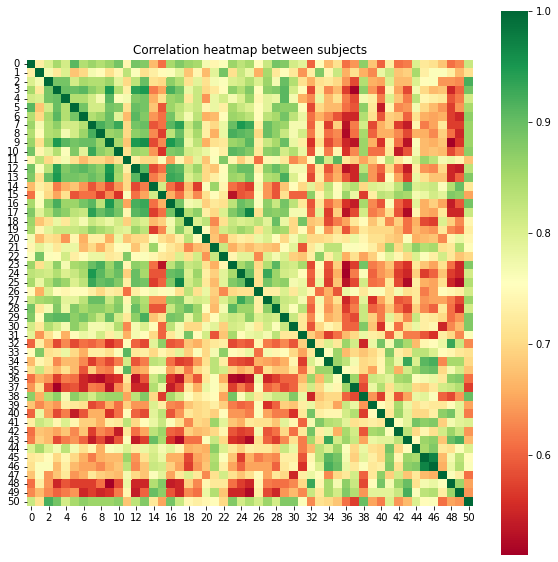

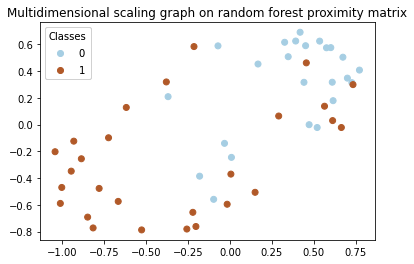

In [ ]:
'''Proximity Matrix Clustering and metric MDS'''

tuned_rf.fit(X,y)

#make proximity matrix to cluster subjects
def proximityMatrix(model, X, normalize=True):

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat

prox_matrix = proximityMatrix(tuned_rf, X, normalize=True)
#make a heatmap from proximity matrix to find subjects clustering together
plt.figure(figsize=[10,10])
sns.heatmap(prox_matrix,square=True,cmap="RdYlGn")
plt.title('Correlation heatmap between subjects')
plt.show()

#make MDS plot with proximity matrix to find subjects clustering together
mds = MDS(n_components=2,random_state=0,metric=True)
mds_coordinates = mds.fit_transform(prox_matrix)

mds_df = pd.DataFrame(mds_coordinates,columns=["x","y"],index=df.index)
mds_df = pd.concat([mds_df,pd.Series(df['Year Fall'])],axis=1)

fig, ax = plt.subplots()

scatter = ax.scatter(mds_df.x, mds_df.y,c=mds_df['Year Fall'],cmap=plt.cm.Paired)
plt.title('Multidimensional scaling graph on random forest proximity matrix')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)

#for sample in mds_df.index:
    #plt.annotate(sample,(mds_df.x.loc[sample],mds_df.y.loc[sample]))
plt.show()

In [ ]:
'''SVM on MDS features'''

X_mds = mds_df.drop(['Year Fall'],axis=1).values
y_mds = mds_df['Year Fall'].values

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}
svm = SVC()
gscv10 = GridSearchCV(svm,param_grid,cv=cv)
gscv10.fit(X_mds,y_mds)
print("Best params are {}".format(gscv10.best_params_))
print("Best score is {}".format(gscv10.best_score_))

optimal_C = gscv10.best_params_['C']
optimal_gamma = gscv10.best_params_['gamma']
optimal_kernel = gscv10.best_params_['kernel']

tuned_sv = SVC(C=optimal_C, gamma=optimal_gamma, kernel=optimal_kernel)
cv10 = cross_val_score(tuned_sv,X_mds,y_mds,cv=cv)
model_names.append('SVM on MDS feats')
scores.append(cv10)
print(cv10)
print(np.mean(cv10))

Best params are {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best score is 0.7836363636363636
[0.81818182 0.7        0.6        0.9        0.9       ]
0.7836363636363636


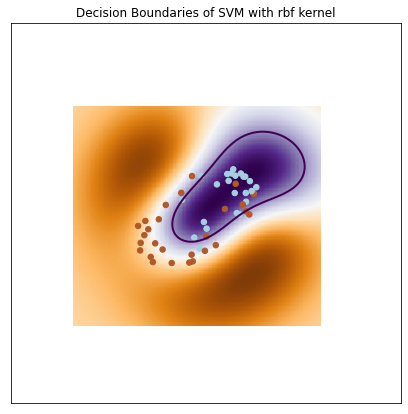

In [ ]:
'''Plot SVM decision boundaries on MDS features'''

def make_meshgrid(x, y, h=0.02):
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

xx, yy = make_meshgrid(X_mds[:,0],X_mds[:,1])

tuned_sv.fit(X_mds,y_mds)

# plot the decision function for each datapoint on the grid
Z = tuned_sv.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=[7,7])
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X_mds[:, 0], X_mds[:, 1], s=30, c=y_mds, cmap=plt.cm.Paired)
plt.title(f'Decision Boundaries of SVM with {optimal_kernel} kernel')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

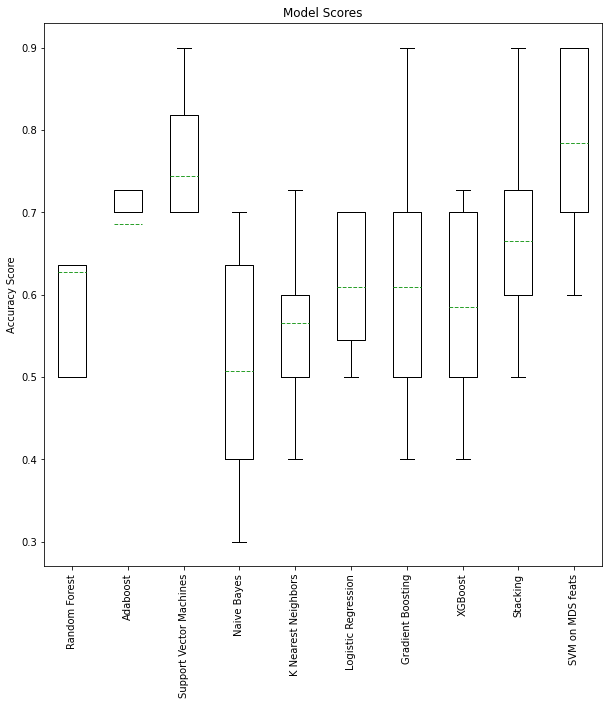

In [ ]:
# Plot Results
plt.figure(figsize=[10,10])
plt.title('Model Scores')
plt.ylabel('Accuracy Score')
plt.boxplot(scores,labels=model_names,showmeans=True,meanline=True,showfliers=False,medianprops =dict(linestyle='-.', linewidth=0, color='firebrick'))
plt.xticks(rotation=90)
plt.show()